In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\akash\OneDrive\Documents\dataset\drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True,dtype=int)

In [4]:
df_encoded

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,DrugY,0,0,0,0
1,47,13.093,drugC,1,1,0,0
2,47,10.114,drugC,1,1,0,0
3,28,7.798,drugX,0,0,1,0
4,61,18.043,DrugY,0,1,0,0
...,...,...,...,...,...,...,...
195,56,11.567,drugC,0,1,0,0
196,16,12.006,drugC,1,1,0,0
197,52,9.894,drugX,1,0,1,0
198,23,14.020,drugX,1,0,1,1


In [5]:
X=df_encoded.drop(columns='Drug')
X

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,0
2,47,10.114,1,1,0,0
3,28,7.798,0,0,1,0
4,61,18.043,0,1,0,0
...,...,...,...,...,...,...
195,56,11.567,0,1,0,0
196,16,12.006,1,1,0,0
197,52,9.894,1,0,1,0
198,23,14.020,1,0,1,1


In [6]:
y = df['Drug']
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
from sklearn.tree import DecisionTreeClassifier
drg_tree = DecisionTreeClassifier(max_depth=4,criterion= 'entropy')
drg_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [35]:
from sklearn.tree import plot_tree

[Text(0.75, 0.9, 'Na_to_K <= 14.829\nentropy = 1.923\nsamples = 160\nvalue = [76, 17, 13, 11, 43]\nclass = DrugY'),
 Text(0.625, 0.7, 'BP_NORMAL <= 0.5\nentropy = 1.762\nsamples = 84\nvalue = [0, 17, 13, 11, 43]\nclass = drugX'),
 Text(0.5, 0.5, 'BP_LOW <= 0.5\nentropy = 1.98\nsamples = 53\nvalue = [0, 17, 13, 11, 12]\nclass = drugA'),
 Text(0.25, 0.3, 'Age <= 50.5\nentropy = 0.987\nsamples = 30\nvalue = [0, 17, 13, 0, 0]\nclass = drugA'),
 Text(0.125, 0.1, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17, 0, 0, 0]\nclass = drugA'),
 Text(0.375, 0.1, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0, 0]\nclass = drugB'),
 Text(0.75, 0.3, 'Cholesterol_NORMAL <= 0.5\nentropy = 0.999\nsamples = 23\nvalue = [0, 0, 0, 11, 12]\nclass = drugX'),
 Text(0.625, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0]\nclass = drugC'),
 Text(0.875, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 0, 12]\nclass = drugX'),
 Text(0.75, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [0, 0, 0, 0, 31]\

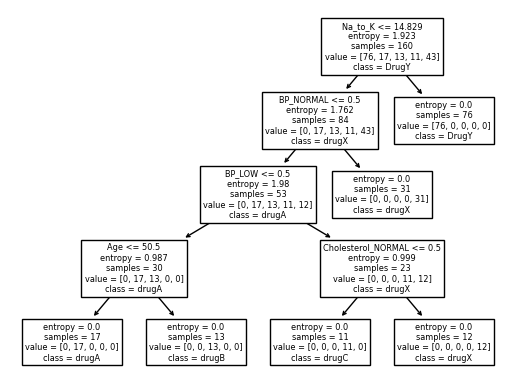

In [36]:
plot_tree(drg_tree,feature_names=X.columns.tolist(),class_names=drg_tree.classes_.tolist())

In [37]:
drg_tree.predict_proba(X_test)

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1.

In [38]:
y_pred=drg_tree.predict(X_test)
y_pred

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'drugX', 'drugC', 'DrugY', 'drugB',
       'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugC', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'drugC', 'drugC', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'drugA', 'DrugY', 'drugA'], dtype=object)

In [49]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,recall_score

In [42]:
print(f'Accuracy : {accuracy_score(y_test,y_pred)*100} %')

Accuracy : 100.0 %


- When max_dep is 3, accuracy is 80% and max_depth=4, accuracy is 100%
- Accuracy varies with the change in max_depth

In [53]:
f1Score = f1_score(y_test,y_pred,average='macro')
f1Score

1.0

In [54]:
recall_score(y_test, y_pred,average='macro')

1.0

#### When max_depth get changed it also changes in the evaluation metrices like accuracy,f1_score,recall score etc